In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.drop(["User ID", "Gender"], axis = 1)

In [5]:
X = df.iloc[:, :-1].values

In [6]:
y = df.iloc[:, -1].values

In [7]:
sc_X = StandardScaler()

In [8]:
X = sc_X.fit_transform(X)

c:\users\jaide\anaconda3\envs\mlai\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\jaide\anaconda3\envs\mlai\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [10]:
classifier = GaussianNB()

In [11]:
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
cm = confusion_matrix(y_test, y_pred)

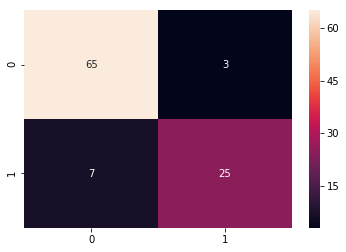

In [15]:
sns.heatmap(cm, annot = True)

Text(0, 0.5, 'Salary')

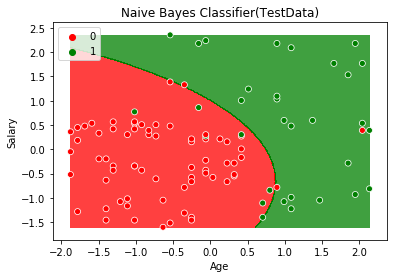

In [16]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min(), X_set[:, 0].max(), 0.01),
                    np.arange(X_set[:, 1].min(), X_set[:, 1].max(), 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            cmap = ListedColormap(("red", "green")), alpha = 0.75)
sns.scatterplot(X_set[:, 0], X_set[:, 1], hue = y_set, palette = {0:"red", 1:"green"})
plt.title("Naive Bayes Classifier(TestData)")
plt.xlabel("Age")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

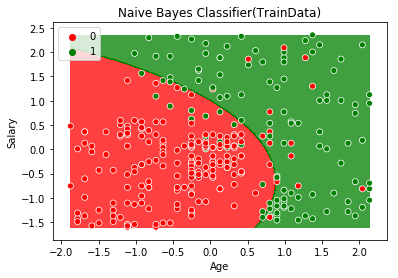

In [17]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min(), X_set[:, 0].max(), 0.01),
                    np.arange(X_set[:, 1].min(), X_set[:, 1].max(), 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            cmap = ListedColormap(("red", "green")), alpha = 0.75)
sns.scatterplot(X_set[:, 0], X_set[:, 1], hue = y_set, palette = {0:"red", 1:"green"})
plt.title("Naive Bayes Classifier(TrainData)")
plt.xlabel("Age")
plt.ylabel("Salary")